In [3]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from scipy.sparse import hstack

from sklearn import model_selection
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

import sys
sys.path.append('/mnt/c/Users/cleon/Documents/CAL_CAL/ironhack/Final_project/Redefining_Cancer_treatment/src')
import mlfunctions as mlf

import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (10.,8.)})
sns.set_style("whitegrid")


# MACHINE LEARNING

# 1. Reading Data

In [5]:
train = pd.read_csv('../data/trainclean.csv')
test = pd.read_csv('../data/testclean.csv')

In [6]:
train.drop(columns= ['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)
test.drop(columns= ['Unnamed: 0', 'Unnamed: 0.1'],inplace=True)

In [7]:
train.head()

,ID,Gene,Variation,VariationType,Effect,Class,TEXT,GeneType,Chromosome,Role,TumourType
0,0,FAM58A,Truncating Mutations,unknown,nonsense,1,cyclin dependent kinases cdks regulate variety...,Unknown,unknown,Unknown,Unknown
1,1,CBL,W802*,Substitution,nonsense,2,abstract background non small cell lung cancer...,protein-coding,11,"oncogene, TSG, fusion","AML, JMML, MDS"
2,2,CBL,Q249E,Substitution,missense,2,abstract background non small cell lung cancer...,protein-coding,11,"oncogene, TSG, fusion","AML, JMML, MDS"
3,3,CBL,N454D,Substitution,missense,3,recent evidence demonstrated acquired uniparen...,protein-coding,11,"oncogene, TSG, fusion","AML, JMML, MDS"
4,4,CBL,L399V,Substitution,missense,4,oncogenic mutations monomeric casitas b lineag...,protein-coding,11,"oncogene, TSG, fusion","AML, JMML, MDS"


# 2. Split into train, split and cross validation

In [8]:
X = train.drop(columns='Class')
y = train.Class

In [9]:
#Spliting in train and test maintaining the proportion of each class in both datasets--> stratify = y

X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [10]:
#Splitting in train and cross validation
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

# 3. Machine Learning Models

## 3.1. Stacking features

In [11]:
vectorizer = CountVectorizer()

train_Genefeature_onehotCoding = vectorizer.fit_transform(train_df['Gene'])
test_Genefeature_onehotCoding = vectorizer.transform(test_df['Gene'])
cv_Genefeature_onehotCoding = vectorizer.transform(cv_df['Gene'])

vectorizer = CountVectorizer()

train_Variationfeature_onehotCoding = vectorizer.fit_transform(train_df['Variation'])
test_Variationfeature_onehotCoding = vectorizer.transform(test_df['Variation'])
cv_Variationfeature_onehotCoding = vectorizer.transform(cv_df['Variation'])

vectorizer = CountVectorizer()

train_VariationTypefeature_onehotCoding = vectorizer.fit_transform(train_df['VariationType'])
test_VariationTypefeature_onehotCoding = vectorizer.transform(test_df['VariationType'])
cv_VariationTypefeature_onehotCoding = vectorizer.transform(cv_df['VariationType'])

vectorizer = CountVectorizer()

train_Effectfeature_onehotCoding = vectorizer.fit_transform(train_df['Effect'])
test_Effectfeature_onehotCoding = vectorizer.transform(test_df['Effect'])
cv_Effectfeature_onehotCoding = vectorizer.transform(cv_df['Effect'])

vectorizer = CountVectorizer()

train_GeneTypefeature_onehotCoding = vectorizer.fit_transform(train_df['GeneType'])
test_GeneTypefeature_onehotCoding = vectorizer.transform(test_df['GeneType'])
cv_GeneTypefeature_onehotCoding = vectorizer.transform(cv_df['GeneType'])

vectorizer = CountVectorizer()

train_Chromosomefeature_onehotCoding = vectorizer.fit_transform(train_df['Chromosome'])
test_Chromosomefeature_onehotCoding = vectorizer.transform(test_df['Chromosome'])
cv_Chromosomefeature_onehotCoding = vectorizer.transform(cv_df['Chromosome'])

vectorizer = CountVectorizer()

train_Rolefeature_onehotCoding = vectorizer.fit_transform(train_df['Role'])
test_Rolefeature_onehotCoding = vectorizer.transform(test_df['Role'])
cv_Rolefeature_onehotCoding = vectorizer.transform(cv_df['Role'])

vectorizer = CountVectorizer()

train_TumourTypefeature_onehotCoding = vectorizer.fit_transform(train_df['TumourType'])
test_TumourTypefeature_onehotCoding = vectorizer.transform(test_df['TumourType'])
cv_TumourTypefeature_onehotCoding = vectorizer.transform(cv_df['TumourType'])


In [12]:
text_vectorizer = CountVectorizer(min_df = 3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [11]:
type(train_VariationTypefeature_onehotCoding)

scipy.sparse.csr.csr_matrix

In [12]:
train_feat_OHC = hstack((train_Genefeature_onehotCoding,
                        train_Variationfeature_onehotCoding,
                        train_VariationTypefeature_onehotCoding,
                        train_Effectfeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_Chromosomefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [13]:
test_feat_OHC = hstack((test_Genefeature_onehotCoding,
                        test_Variationfeature_onehotCoding,
                        test_VariationTypefeature_onehotCoding,
                        test_Effectfeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_Chromosomefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [14]:
cv_feat_OHC = hstack((cv_Genefeature_onehotCoding,
                        cv_Variationfeature_onehotCoding,
                        cv_VariationTypefeature_onehotCoding,
                        cv_Effectfeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_Chromosomefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [15]:
type(train_feat_OHC)

scipy.sparse.coo.coo_matrix

In [16]:
train_feat_OHC.shape

(2124, 2421)

In [17]:
train_x = hstack((train_feat_OHC,train_text_feature_onehotCoding))
test_x = hstack((test_feat_OHC,test_text_feature_onehotCoding))
cv_x = hstack((cv_feat_OHC,cv_text_feature_onehotCoding))

In [18]:
train_x.shape

(2124, 56256)

In [19]:
test_x.shape

(665, 56256)

In [20]:
cv_x.shape

(532, 56256)

## 3.2. Models

In [76]:
models = ['Multinomial Naive Bayes', 'K-nearest', 'Logistic Regression' 'Random Forest']
train_log_loss =[]
test_log_loss = []
cv_log_loss = []
best_param = []
metrics = []

### 3.2.1. Naive-Bayes

##### 3.2.1.1. Hyper Paramater

In [74]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []

for i in alpha:
    print("For alpha =", i)
    mnb = MultinomialNB(alpha=i)
    mnb.fit(train_x, y_train)
    #To predict the probability of each class to happend, we use CalibratedClassifierCV
    cv_mnb = CalibratedClassifierCV(mnb, method="sigmoid")
    cv_mnb.fit(train_x, y_train)
    cv_mnb_probs = cv_mnb.predict_proba(cv_x)
    cv_log_error_array.append(log_loss(y_cv, cv_mnb_probs))
    # To avoid rounding error while multiplying probabilites, we use log-probability estimates
    print("Log Loss:", round(log_loss(y_cv, cv_mnb_probs),4)) 

For alpha = 1e-05
Log Loss: 1.3111
For alpha = 0.0001
Log Loss: 1.3098
For alpha = 0.001
Log Loss: 1.2972
For alpha = 0.1
Log Loss: 1.3229
For alpha = 1
Log Loss: 1.3147
For alpha = 10
Log Loss: 1.4281
For alpha = 100
Log Loss: 1.4057
For alpha = 1000
Log Loss: 1.398


In [75]:
best_alpha= 0.001
best_param.append(best_alpha)

##### 3.2.1.2. Best Paramater

In [77]:
mnb = MultinomialNB(alpha=best_alpha)
mnb.fit(train_x, y_train)
#To predict the probability of each class to happend, we use CalibratedClassifierCV
cv_mnb = CalibratedClassifierCV(mnb, method="sigmoid")
cv_mnb.fit(train_x, y_train)

cv_mnb_probs = cv_mnb.predict_proba(cv_x)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_mnb_probs),4))
test_mnb_probs = cv_mnb.predict_proba(test_x)
print("Log Loss for test:", round(log_loss(y_test, test_mnb_probs),4))
train_mnb_probs = cv_mnb.predict_proba(train_x)
print("Log Loss for train:", round(log_loss(y_train, train_mnb_probs),4))

train_log_loss.append(round(log_loss(y_train, train_mnb_probs),4))
test_log_loss.append(round(log_loss(y_test, test_mnb_probs),4))
cv_log_loss .append(round(log_loss(y_cv, cv_mnb_probs),4))

Log Loss for cross_validation: 1.2972
Log Loss for test: 1.2019
Log Loss for train: 0.8305


##### 3.2.1.3. Metrics

In [46]:
type(y_cv)

pandas.core.series.Series

In [47]:
type(cv_x)

scipy.sparse.coo.coo_matrix

In [48]:
type(cv_x.toarray())

numpy.ndarray

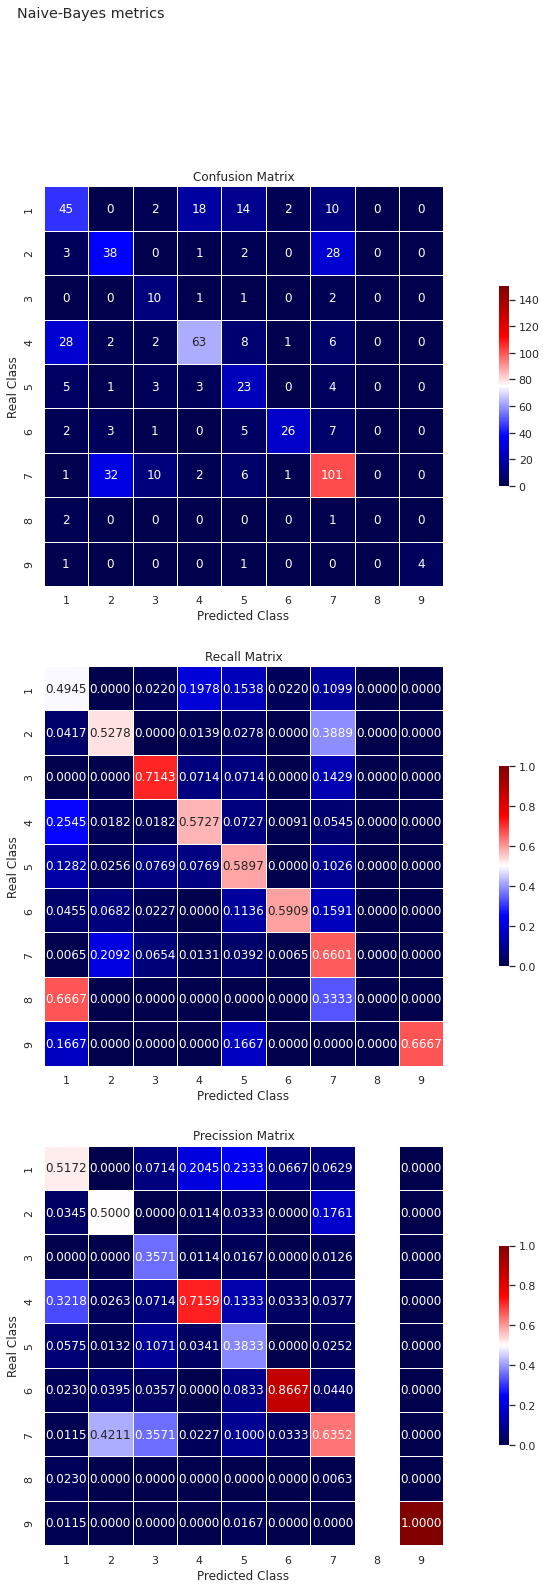

In [49]:
mnb_metrics = mlf.metrics(y_cv, cv_mnb.predict(cv_x.toarray()), 'Naive-Bayes')

In [33]:
metrics.append(mnb_metrics)

In [50]:
pickle.dump(cv_mnb, open("../models/mnb_basic", 'wb'))

### 3.2.2. K-nearest neighbor

##### 3.2.2.1. Hyper Paramater tuning

In [37]:
alpha = [3,5,7,10,20,40]
cv_log_error_array = []

for i in alpha:
    print("For alpha =", i)
    kn = KNeighborsClassifier(n_neighbors=i)
    kn.fit(train_x, y_train)
    #To predict the probability of each class to happen, we use CalibratedClassifierCV
    cv_kn = CalibratedClassifierCV(kn, method="sigmoid")
    cv_kn.fit(train_x, y_train)
    cv_kn_probs = cv_kn.predict_proba(cv_x)
    cv_log_error_array.append(log_loss(y_cv, cv_kn_probs))
    # To avoid rounding error while multiplying probabilites, we use log-probability estimates
    print("Log Loss:", round(log_loss(y_cv, cv_kn_probs),4)) 

For alpha = 3
Log Loss: 1.1698
For alpha = 5
Log Loss: 1.1742
For alpha = 7
Log Loss: 1.1908
For alpha = 10
Log Loss: 1.2147
For alpha = 20
Log Loss: 1.2677
For alpha = 40
Log Loss: 1.2996


##### 3.2.2.2. Best Parameter

In [51]:
best_alpha=3
best_param.append(best_alpha)

In [52]:
kn = KNeighborsClassifier(n_neighbors=best_alpha)
kn.fit(train_x, y_train)
cv_kn = CalibratedClassifierCV(kn, method="sigmoid")
cv_kn.fit(train_x, y_train)

cv_kn_probs = cv_kn.predict_proba(cv_x)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_kn_probs),4)) 
test_kn_probs = cv_kn.predict_proba(test_x)
print("Log Loss for test:", round(log_loss(y_test, test_kn_probs),4))
train_kn_probs = cv_kn.predict_proba(train_x)
print("Log Loss for train:", round(log_loss(y_train, train_kn_probs),4))

train_log_loss.append(round(log_loss(y_train, train_kn_probs),4))
test_log_loss.append(round(log_loss(y_test, test_kn_probs),4)
cv_log_loss .append(round(log_loss(y_cv, cv_kn_probs),4))

Log Loss for cross_validation:: 1.1698
Log Loss for test: 1.0849
Log Loss for train: 0.8216


##### 3.2.2.3. Metrics


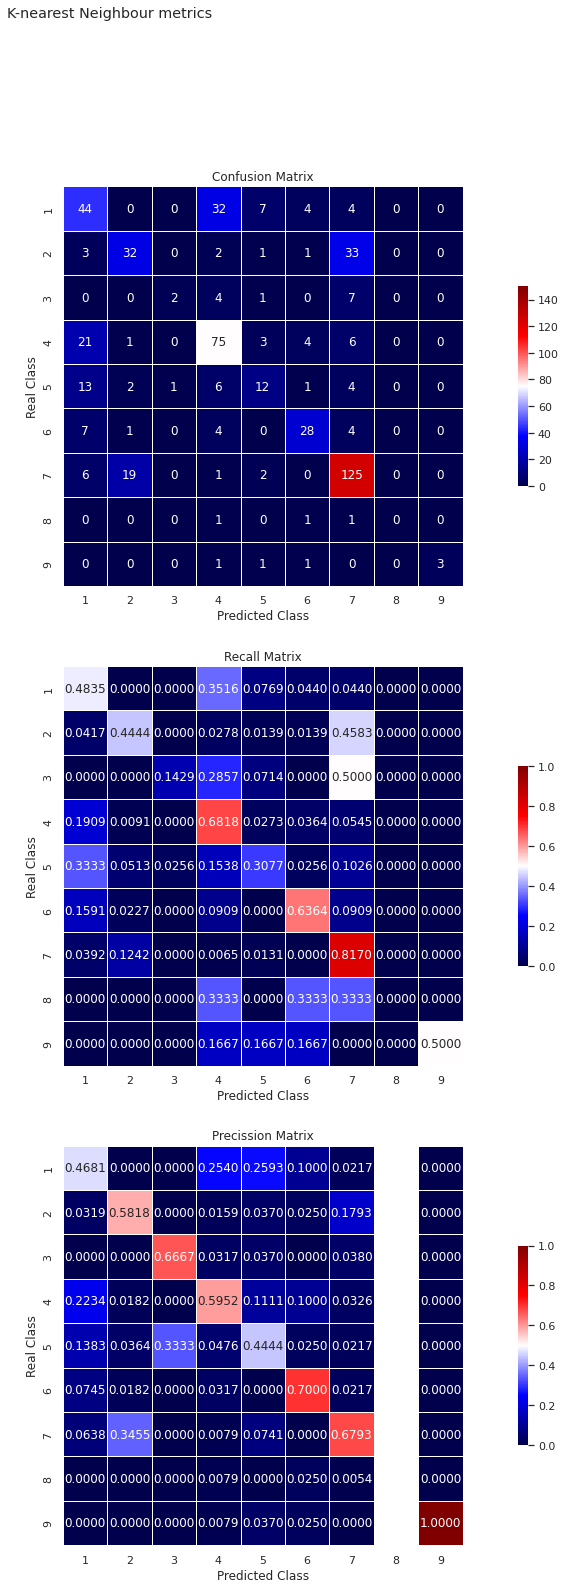

In [54]:
kn_metrics = mlf.metrics(y_cv, cv_kn.predict(cv_x.toarray()), 'K-nearest Neighbour')
metrics.append(mnb_metrics)

In [55]:
pickle.dump(cv_kn, open("../models/kn_basic", 'wb'))

### 3.2.3. Logistic Regression

In [57]:
alpha = [10**x for x in range(-5,2)]
cv_log_error_array = []

for i in alpha:
    print("For alpha =", i)
    sgd = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    sgd.fit(train_x, y_train)
    #To predict the probability of each class to happen, we use CalibratedClassifierCV
    cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
    cv_sgd.fit(train_x, y_train)
    cv_sgd_probs = cv_sgd.predict_proba(cv_x)
    cv_log_error_array.append(log_loss(y_cv, cv_sgd_probs))
    # To avoid rounding error while multiplying probabilites, we use log-probability estimates
    print("Log Loss:", round(log_loss(y_cv, cv_sgd_probs),4)) 

For alpha = 1e-05
Log Loss: 1.185
For alpha = 0.0001
Log Loss: 1.0926
For alpha = 0.001
Log Loss: 0.9957
For alpha = 0.01
Log Loss: 0.9968
For alpha = 0.1
Log Loss: 1.1516
For alpha = 1
Log Loss: 1.4805
For alpha = 10
Log Loss: 1.6272


#### 3.2.3.2. Best parameters

In [58]:
best_alpha=0.001
best_param.append(best_alpha)

In [59]:
sgd = SGDClassifier(class_weight='balanced', alpha=best_alpha, penalty='l2', loss='log', random_state=42)
sgd.fit(train_x, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

train_log_loss.append(round(log_loss(y_train, train_sgd_probs),4))
test_log_loss.append(round(log_loss(y_test, test_sgd_probs),4))
cv_log_loss .append(round(log_loss(y_cv, cv_sgd_probs),4))

Log Loss for cross_validation: 0.9957
Log Loss for test: 0.9003
Log Loss for train: 0.5056


#### 3.2.3.3. Metrics

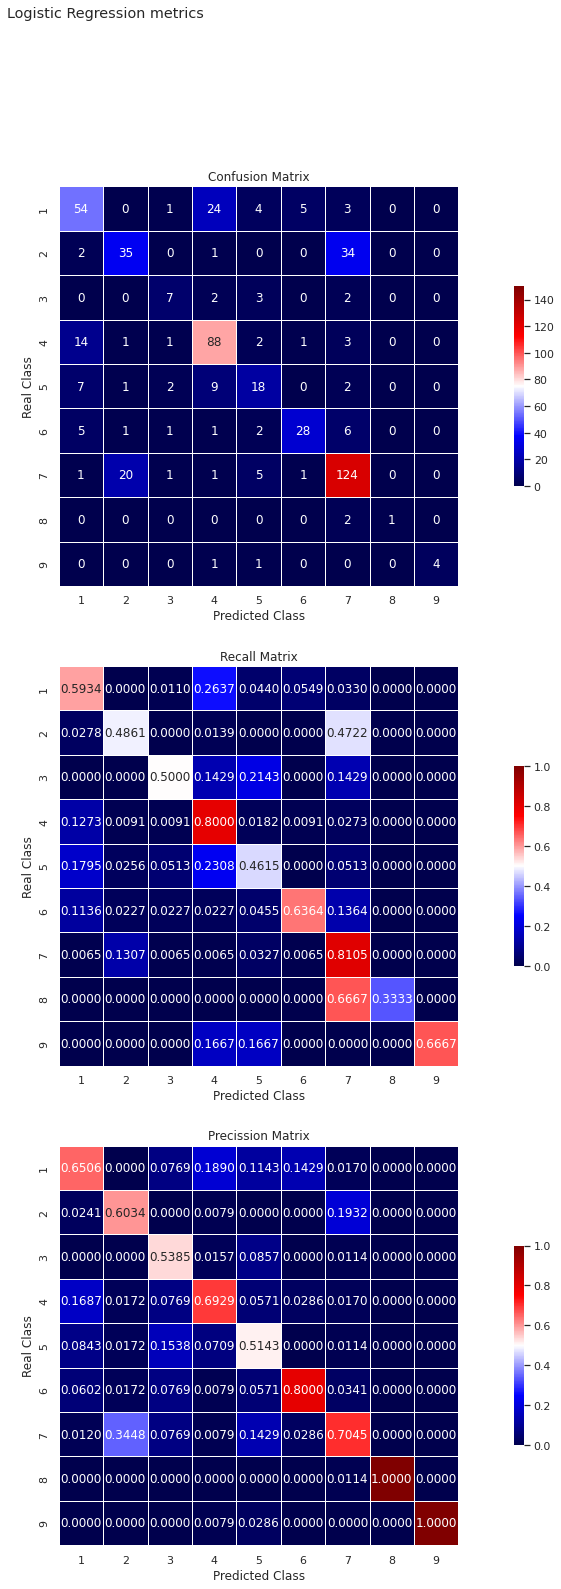

In [108]:
sgd_metrics = mlf.metrics(y_cv, cv_sgd.predict(cv_x.toarray()), 'Logistic Regression')
metrics.append(sgd_metrics)

In [109]:
pickle.dump(cv_sgd, open("../models/sgd_basic", 'wb'))

### 3.2.4. Random Forest

#### 3.2.4.2. Hyper parameter tunning

In [65]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []

for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        rfc = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        rfc.fit(train_x, y_train)
        cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
        cv_rfc.fit(train_x, y_train)
        cv_rfc_probs = cv_rfc.predict_proba(cv_x)
        cv_log_error_array.append(log_loss(y_cv, cv_rfc_probs))
        print("Log Loss :",log_loss(y_cv, cv_rfc_probs)) 


for n_estimators = 100 and max depth =  5
Log Loss : 1.1855023754099923
for n_estimators = 100 and max depth =  10
Log Loss : 1.1404149684115823
for n_estimators = 200 and max depth =  5
Log Loss : 1.1822430223907658
for n_estimators = 200 and max depth =  10
Log Loss : 1.1283517234753584
for n_estimators = 500 and max depth =  5
Log Loss : 1.1820031578599488
for n_estimators = 500 and max depth =  10
Log Loss : 1.128352504418229
for n_estimators = 1000 and max depth =  5
Log Loss : 1.182325132877757
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1258421594562151
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1813224354838716
for n_estimators = 2000 and max depth =  10
Log Loss : 1.127053545682692


#### 3.2.4.2. Best parameters

In [66]:
best_alpha=[1000,10]
best_param.append(best_alpha)

In [67]:
rfc = RandomForestClassifier(n_estimators=best_alpha[0], criterion='gini', max_depth=best_alpha[1], random_state=42, n_jobs=-1)
rfc.fit(train_x, y_train)
cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
cv_rfc.fit(train_x, y_train)

cv_rfc_probs = cv_rfc.predict_proba(cv_x)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc.predict_proba(test_x)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc.predict_proba(train_x)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


train_log_loss.append(round(log_loss(y_train, train_rfc_probs),4))
test_log_loss.append(round(log_loss(y_test, test_rfc_probs),4))
cv_log_loss .append(round(log_loss(y_cv, cv_rfc_probs),4))

Log Loss for cross_validation: 1.1258
Log Loss for test: 1.0622
Log Loss for train: 0.6577


#### 3.2.4.3. Metrics

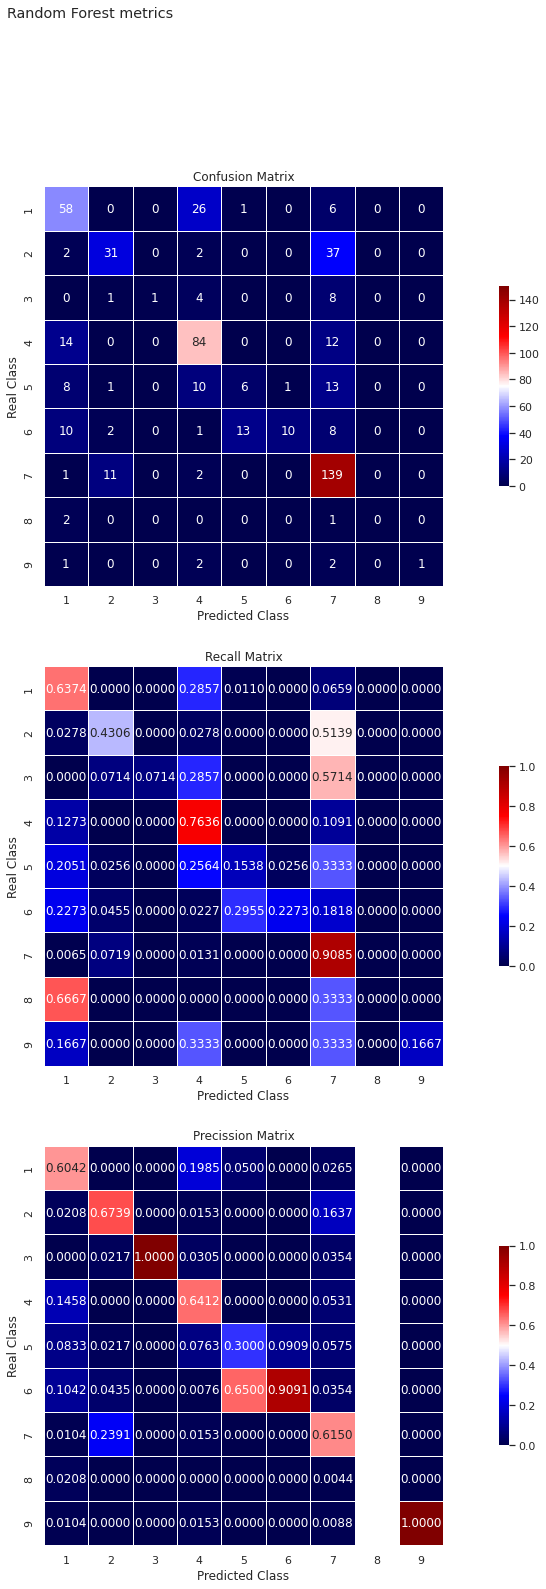

In [68]:
rfc_metrics = mlf.metrics(y_cv, cv_rfc.predict(cv_x.toarray()), 'Random Forest')
metrics.append(rfc_metrics)

### 3.2.5. Saving models KPI

In [96]:
models = pd.DataFrame(list(zip(train_log_loss, test_log_loss, cv_log_loss, best_param, metrics)))

In [97]:
models = models.T


In [98]:
models

,0,1,2,3
0,0.8305,0.8216,0.5056,0.6577
1,1.2019,1.0849,0.9003,1.0622
2,1.2972,1.1698,0.9957,1.1258
3,0.001,3,0.001,"[1000, 10]"
4,Figure(1440x1800),Figure(1440x1800),Figure(1440x1800),Figure(1440x1800)


In [99]:
models.rename({0:'Multinomial Naive Bayes', 1:'K-nearest', 2:'Logistic Regression',3: 'Random Forest'},axis=1, inplace=True)

In [103]:
indexx = ['train_log_loss', 'test_log_loss', 'cv_log_loss', 'best_param', 'metrics']
models.index = indexx

In [104]:
models

,Multinomial Naive Bayes,K-nearest,Logistic Regression,Random Forest
train_log_loss,0.8305,0.8216,0.5056,0.6577
test_log_loss,1.2019,1.0849,0.9003,1.0622
cv_log_loss,1.2972,1.1698,0.9957,1.1258
best_param,0.001,3,0.001,"[1000, 10]"
metrics,Figure(1440x1800),Figure(1440x1800),Figure(1440x1800),Figure(1440x1800)


In [113]:
models.to_csv('../data/basicmodelsKPI.csv')

## 3.2. Feature Optimization

As the difference between cv_log_loss, test_log_loss and train_log_loss shown in the previus Dataframe are quite important, we need to try to optimize model features to minimize overfitting of the models.

For doing so, we are going to use the relation between each feature and the response ('Class') as calculated in 2_EDA Notebook. We will start by importing the csv that contains log_loss for each model made with each of the features.

In [116]:
feature_errors = pd.read_csv('../data/feature_errors.csv')

In [117]:
feature_errors

,Unnamed: 0,0
0,TEXT,1.0648
1,Gene,1.1842
2,TumourType,1.3275
3,Role,1.4920
4,GeneType,1.5905
5,Chromosome,1.6327
6,Variation,1.7168
7,Effect,1.7373
8,VariationType,1.7710


In [18]:
models = pd.read_csv('../data/basicmodelsKPI.csv')

### 3.2.1. Feature Stacking: 5 best features

In [123]:
train_feat_OHC_opt = hstack((train_Genefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [124]:
test_feat_OHC_opt = hstack((test_Genefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [125]:
cv_feat_OHC_opt = hstack((cv_Genefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [126]:
train_x_opt = hstack((train_feat_OHC_opt, train_text_feature_onehotCoding))
test_x_opt = hstack((test_feat_OHC_opt, test_text_feature_onehotCoding))
cv_x_opt = hstack((cv_feat_OHC_opt, cv_text_feature_onehotCoding))

#### 3.2.1.1. Logistic Regression

In [129]:
sgd = SGDClassifier(class_weight='balanced', alpha=models['Logistic Regression'][3], penalty='l2', loss='log', random_state=42)
sgd.fit(train_x_opt, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x_opt, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x_opt)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x_opt)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x_opt)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

sgd_loss_cv_5 = round(log_loss(y_cv, cv_sgd_probs),4)
sgd_loss_test_5 = round(log_loss(y_test, test_sgd_probs),4)
sgd_loss_train_5 = round(log_loss(y_train, train_sgd_probs),4)

Log Loss for cross_validation: 1.0397
Log Loss for test: 0.9515
Log Loss for train: 0.5824


#### 3.2.1.2. Randon Forest

In [132]:
# rfc2 = RandomForestClassifier(n_estimators=models['Random Forest'][3][0], criterion='gini', max_depth=models['Random Forest'][3][1], random_state=42, n_jobs=-1)
rfc2 = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
rfc2.fit(train_x_opt, y_train)
cv_rfc2 = CalibratedClassifierCV(rfc2, method="sigmoid")
cv_rfc2.fit(train_x_opt, y_train)

cv_rfc_probs = cv_rfc2.predict_proba(cv_x_opt)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc2.predict_proba(test_x_opt)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc2.predict_proba(train_x_opt)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


rfc_loss_train_5 = round(log_loss(y_train, train_rfc_probs),4)
rfc_loss_test_5 = round(log_loss(y_test, test_rfc_probs),4)
rfc_loss_cv_5 =round(log_loss(y_cv, cv_rfc_probs),4)

Log Loss for cross_validation: 1.1389
Log Loss for test: 1.0714
Log Loss for train: 0.6883


### 3.2.2. Feature Stacking: 6 best features

In [133]:
train_feat_OHC_opt2 = hstack((train_Genefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_Chromosomefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [134]:
test_feat_OHC_opt2 = hstack((test_Genefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_Chromosomefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [135]:
cv_feat_OHC_opt2 = hstack((cv_Genefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_Chromosomefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [136]:
train_x_opt2 = hstack((train_feat_OHC_opt2, train_text_feature_onehotCoding))
test_x_opt2 = hstack((test_feat_OHC_opt2, test_text_feature_onehotCoding))
cv_x_opt2 = hstack((cv_feat_OHC_opt2, cv_text_feature_onehotCoding))

#### 3.2.2.1. Logistic Regression

In [137]:
sgd = SGDClassifier(class_weight='balanced', alpha=models['Logistic Regression'][3], penalty='l2', loss='log', random_state=42)
sgd.fit(train_x_opt2, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x_opt2, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x_opt2)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x_opt2)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x_opt2)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

sgd_loss_cv_6 = round(log_loss(y_cv, cv_sgd_probs),4)
sgd_loss_test_6 = round(log_loss(y_test, test_sgd_probs),4)
sgd_loss_train_6 = round(log_loss(y_train, train_sgd_probs),4)

Log Loss for cross_validation: 1.0373
Log Loss for test: 0.9479
Log Loss for train: 0.5798


#### 3.2.2.2. Randon Forest

In [138]:
rfc = RandomForestClassifier(n_estimators=models['Random Forest'][3][0], criterion='gini', max_depth=models['Random Forest'][3][1], random_state=42, n_jobs=-1)
rfc.fit(train_x_opt2, y_train)
cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
cv_rfc.fit(train_x_opt2, y_train)

cv_rfc_probs = cv_rfc.predict_proba(cv_x_opt2)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc.predict_proba(test_x_opt2)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc.predict_proba(train_x_opt2)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


rfc_loss_train_6 = round(log_loss(y_train, train_rfc_probs),4)
rfc_loss_test_6 = round(log_loss(y_test, test_rfc_probs),4)
rfc_loss_cv_6 =round(log_loss(y_cv, cv_rfc_probs),4)

Log Loss for cross_validation: 1.1392
Log Loss for test: 1.0757
Log Loss for train: 0.6886


### 3.2.3. Feature Stacking: 7 best features

In [13]:
train_feat_OHC_opt3 = hstack((train_Genefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_Variationfeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_Chromosomefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [14]:
test_feat_OHC_opt3 = hstack((test_Genefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_Variationfeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_Chromosomefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [15]:
cv_feat_OHC_opt3 = hstack((cv_Genefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_Variationfeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_Chromosomefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [16]:
train_x_opt3 = hstack((train_feat_OHC_opt3, train_text_feature_onehotCoding))
test_x_opt3 = hstack((test_feat_OHC_opt3, test_text_feature_onehotCoding))
cv_x_opt3 = hstack((cv_feat_OHC_opt3, cv_text_feature_onehotCoding))

#### 3.2.3.1. Logistic Regression

In [19]:
sgd = SGDClassifier(class_weight='balanced', alpha=models['Logistic Regression'][3], penalty='l2', loss='log', random_state=42)
sgd.fit(train_x_opt3, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x_opt3, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x_opt3)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x_opt3)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x_opt3)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

sgd_loss_cv_7 = round(log_loss(y_cv, cv_sgd_probs),4)
sgd_loss_test_7 = round(log_loss(y_test, test_sgd_probs),4)
sgd_loss_train_7 = round(log_loss(y_train, train_sgd_probs),4)

TypeError: '<' not supported between instances of 'str' and 'float'

#### 3.2.3.2. Randon Forest

In [21]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
rfc.fit(train_x_opt3, y_train)
cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
cv_rfc.fit(train_x_opt3, y_train)

cv_rfc_probs = cv_rfc.predict_proba(cv_x_opt3)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc.predict_proba(test_x_opt3)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc.predict_proba(train_x_opt3)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


rfc_loss_train_6 = round(log_loss(y_train, train_rfc_probs),4)
rfc_loss_test_6 = round(log_loss(y_test, test_rfc_probs),4)
rfc_loss_cv_6 =round(log_loss(y_cv, cv_rfc_probs),4)

Log Loss for cross_validation: 1.171
Log Loss for test: 1.1083
Log Loss for train: 0.6638


### 3.2.4. Feature Stacking: 8 best features

In [22]:
train_feat_OHC_opt4 = hstack((train_Genefeature_onehotCoding,
                        train_Rolefeature_onehotCoding,
                        train_Effectfeature_onehotCoding,
                        train_Variationfeature_onehotCoding,
                        train_GeneTypefeature_onehotCoding,
                        train_Chromosomefeature_onehotCoding,
                        train_TumourTypefeature_onehotCoding))

In [23]:
test_feat_OHC_opt4 = hstack((test_Genefeature_onehotCoding,
                        test_Rolefeature_onehotCoding,
                        test_Variationfeature_onehotCoding,
                        test_Effectfeature_onehotCoding,
                        test_GeneTypefeature_onehotCoding,
                        test_Chromosomefeature_onehotCoding,
                        test_TumourTypefeature_onehotCoding))

In [24]:
cv_feat_OHC_opt4 = hstack((cv_Genefeature_onehotCoding,
                        cv_Rolefeature_onehotCoding,
                        cv_Variationfeature_onehotCoding,
                        cv_Effectfeature_onehotCoding,
                        cv_GeneTypefeature_onehotCoding,
                        cv_Chromosomefeature_onehotCoding,
                        cv_TumourTypefeature_onehotCoding))

In [25]:
train_x_opt4 = hstack((train_feat_OHC_opt4, train_text_feature_onehotCoding))
test_x_opt4 = hstack((test_feat_OHC_opt4, test_text_feature_onehotCoding))
cv_x_opt4 = hstack((cv_feat_OHC_opt4, cv_text_feature_onehotCoding))

#### 3.2.4.1. Logistic Regression

In [26]:
sgd = SGDClassifier(class_weight='balanced', alpha=models['Logistic Regression'][3], penalty='l2', loss='log', random_state=42)
sgd.fit(train_x_opt4, y_train)
cv_sgd = CalibratedClassifierCV(sgd, method="sigmoid")
cv_sgd.fit(train_x_opt4, y_train)

cv_sgd_probs = cv_sgd.predict_proba(cv_x_opt4)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_sgd_probs),4)) 
test_sgd_probs = cv_sgd.predict_proba(test_x_opt4)
print("Log Loss for test:", round(log_loss(y_test, test_sgd_probs),4))
train_sgd_probs = cv_sgd.predict_proba(train_x_opt4)
print("Log Loss for train:", round(log_loss(y_train, train_sgd_probs),4))

sgd_loss_cv_8 = round(log_loss(y_cv, cv_sgd_probs),4)
sgd_loss_test_8 = round(log_loss(y_test, test_sgd_probs),4)
sgd_loss_train_8 = round(log_loss(y_train, train_sgd_probs),4)

TypeError: '<' not supported between instances of 'str' and 'float'

#### 3.2.4.2. Randon Forest

In [28]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
rfc.fit(train_x_opt4, y_train)
cv_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
cv_rfc.fit(train_x_opt4, y_train)

cv_rfc_probs = cv_rfc.predict_proba(cv_x_opt4)
print("Log Loss for cross_validation:", round(log_loss(y_cv, cv_rfc_probs),4)) 
test_rfc_probs = cv_rfc.predict_proba(test_x_opt4)
print("Log Loss for test:", round(log_loss(y_test, test_rfc_probs),4))
train_rfc_probs = cv_rfc.predict_proba(train_x_opt4)
print("Log Loss for train:", round(log_loss(y_train, train_rfc_probs),4))


rfc_loss_train_8 = round(log_loss(y_train, train_rfc_probs),4)
rfc_loss_test_8 = round(log_loss(y_test, test_rfc_probs),4)
rfc_loss_cv_8 =round(log_loss(y_cv, cv_rfc_probs),4)

Log Loss for cross_validation: 1.1754
Log Loss for test: 1.1101
Log Loss for train: 0.6629
